# Loading Libraries and Data 

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score





In [2]:
#Importing Data

ds_data = pd.read_csv("clean_kaggle_data_assignment2.csv", encoding= 'unicode_escape')
ds_data = ds_data.iloc[1:] #remove column description
ds_data.head()

clean_data = ds_data[["Q29_Encoded"]].rename(columns = {"Q29_Encoded": "Salary_Bracket"})
clean_data.head()

,Salary_Bracket
1,2.0
2,10.0
3,10.0
4,13.0
5,13.0


# Question 1: Data Cleaning & Feature Engineering


In [3]:
ds_data.dtypes #checking data types 
ds_data.head()
ds_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 1 to 8136
Columns: 298 entries, Duration (in seconds) to Q29_buckets
dtypes: float64(1), object(297)
memory usage: 18.5+ MB


### Data Pre-processing

In [4]:
#Factorize Q2 (Age) to make ordinal numeric variable
age_conditions = [
    (ds_data['Q2'] == '18-21'),
    (ds_data['Q2'] == '22-24'),
    (ds_data['Q2'] == '25-29'),
    (ds_data['Q2'] == '30-34'),
    (ds_data['Q2'] == '35-39'),
    (ds_data['Q2'] == '40-44'),
    (ds_data['Q2'] == '45-49'),
    (ds_data['Q2'] == '50-55'),
    (ds_data['Q2'] == '55-59'),
    (ds_data['Q2'] == '60-69'),
    (ds_data['Q2'] == '70+'),
]

age_values = range (0, 11)
print(list(age_values))

ds_data["age_encoded"] = np.select(age_conditions, age_values)    

clean_data["age_encoded"] = ds_data["age_encoded"]
clean_data.head()



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,Salary_Bracket,age_encoded
1,2.0,8
2,10.0,3
3,10.0,10
4,13.0,5
5,13.0,5


In [5]:
#Remove Non Man/Woman Responses, Convert Sex to Binary Variable
ds_data = ds_data.drop(ds_data[(ds_data["Q3"]== "Nonbinary") |
                               (ds_data["Q3"]== "Prefer not to say") |
                               (ds_data["Q3"]== "Prefer to self-describe")].index)

ds_data["Q3"].value_counts()
#Rename Column
ds_data = ds_data.rename(columns = {"Q3": "sex"})
ds_data.head()

#Change Sex to Binary Variable
ds_data["sex"] = np.where(ds_data["sex"] == "Man", 0, 1)

clean_data['sex'] = ds_data['sex']
clean_data.head()


,Salary_Bracket,age_encoded,sex
1,2.0,8,0.0
2,10.0,3,0.0
3,10.0,10,0.0
4,13.0,5,0.0
5,13.0,5,0.0


In [6]:
usa_list = ['United States of America']
developed_countries_list = ["United Kingdom of Great Britain and Northern Ireland", "Canada", "Spain",
                            "Japan", "France", "Italy", "Netherlands", "Australia", "Germany", "Portugal",
                            "Belgium", "Ireland", "Romania", "Poland"]

ds_data['region_usa'] = ds_data['Q4'].apply(lambda x: 1 if x in usa_list else 0)
ds_data['region_developed'] = ds_data['Q4'].apply(lambda x: 1 if x in developed_countries_list else 0)
ds_data['region_developing'] = ds_data['Q4'].apply(lambda x: 1 if x not in usa_list+developed_countries_list else 0)

clean_data['region_usa'] = ds_data['region_usa']
clean_data['region_developed']  = ds_data['region_developed'] 
clean_data['region_developing'] = ds_data['region_developing']

clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing
1,2.0,8,0.0,0.0,1.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0
3,10.0,10,0.0,0.0,1.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0
5,13.0,5,0.0,1.0,0.0,0.0


In [7]:
#Converting Learning Platforms to "University" and "Online"
ds_data['learned_online'] = ds_data[['Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7','Q6_8','Q6_9']].fillna('').sum(axis=1)
ds_data['learned_online'] = ds_data['learned_online'] != ''

ds_data['university'] = ds_data[['Q6_10']].fillna('').sum(axis=1)
ds_data['university'] = ds_data['university'] != ''

clean_data['learned_online'] = ds_data['learned_online']
clean_data['university'] = ds_data['university']

clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university
1,2.0,8,0.0,0.0,1.0,0.0,True,False
2,10.0,3,0.0,0.0,1.0,0.0,True,False
3,10.0,10,0.0,0.0,1.0,0.0,True,False
4,13.0,5,0.0,1.0,0.0,0.0,True,False
5,13.0,5,0.0,1.0,0.0,0.0,True,False


In [8]:
#Converting Education to Ordinal variable
ds_data["Q8"].value_counts()

edu_conditions = [
    (ds_data['Q8'] == 'No formal education past high school'),
    (ds_data['Q8'] == 'Some college/university study without earning a bachelorEEs degree'),
    (ds_data['Q8'] == 'BachelorEEs degree'),
    (ds_data['Q8'] == 'MasterEEs degree'),
    (ds_data['Q8'] == 'Doctoral degree'),
    (ds_data['Q8'] == 'Professional doctorate'),
]

edu_values = range (0, 6)
print(list(edu_values))

ds_data["edu_encoded"] = np.select(edu_conditions, edu_values)    

clean_data["edu_encoded"] = ds_data["edu_encoded"]
clean_data.head()

[0, 1, 2, 3, 4, 5]


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0


In [9]:
#Converting Publications to Binary
ds_data.Q9.replace(('Yes', 'No'), (1, 0), inplace=True)
clean_data['publications'] = ds_data['Q9']
clean_data.head()


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0


In [10]:
clean_data.shape

(8136, 10)

In [11]:
#Converting Programming Experience to Ordinal Variable
ds_data["Q11"].value_counts() #checking levels

exp_conditions = [
    (ds_data['Q11'] == 'I have never written code'),
    (ds_data['Q11'] == '< 1 years'),
    (ds_data['Q11'] == '1-3 years'),
    (ds_data['Q11'] == '3-5 years'),
    (ds_data['Q11'] == '5-10 years'),
    (ds_data['Q11'] == '10-20 years'),
    (ds_data['Q11'] == '20+ years'),
]

exp_values = range (0, 7)
print(list(exp_values))

ds_data["exp_encoded"] = np.select(exp_conditions, exp_values)    

clean_data["exp_encoded"] = ds_data["exp_encoded"]
clean_data.head()

[0, 1, 2, 3, 4, 5, 6]


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0


In [12]:
#Converting Programming Languages Use to Number of Languages Known
#Q12_1 to Q12_15, except q12_14 as that one = none
ds_data.drop(["Q12_14"], axis =1)

ds_data.Q12_1.replace(np.nan, 0, inplace=True)
ds_data.Q12_2.replace(np.nan, 0, inplace=True)
ds_data.Q12_3.replace(np.nan, 0, inplace=True)
ds_data.Q12_4.replace(np.nan, 0, inplace=True)
ds_data.Q12_5.replace(np.nan, 0, inplace=True)
ds_data.Q12_6.replace(np.nan, 0, inplace=True)
ds_data.Q12_7.replace(np.nan, 0, inplace=True)
ds_data.Q12_8.replace(np.nan, 0, inplace=True)
ds_data.Q12_9.replace(np.nan, 0, inplace=True)
ds_data.Q12_10.replace(np.nan, 0, inplace=True)
ds_data.Q12_11.replace(np.nan, 0, inplace=True)
ds_data.Q12_12.replace(np.nan, 0, inplace=True)
ds_data.Q12_13.replace(np.nan, 0, inplace=True)
ds_data.Q12_15.replace(np.nan, 0, inplace=True)


ds_data['Q12_1'] = ds_data['Q12_1'].where(ds_data['Q12_1'] == 0, 1)
ds_data['Q12_2'] = ds_data['Q12_2'].where(ds_data['Q12_2'] == 0, 1)
ds_data['Q12_3'] = ds_data['Q12_3'].where(ds_data['Q12_3'] == 0, 1)
ds_data['Q12_4'] = ds_data['Q12_4'].where(ds_data['Q12_4'] == 0, 1)
ds_data['Q12_5'] = ds_data['Q12_5'].where(ds_data['Q12_5'] == 0, 1)
ds_data['Q12_6'] = ds_data['Q12_6'].where(ds_data['Q12_6'] == 0, 1)
ds_data['Q12_7'] = ds_data['Q12_7'].where(ds_data['Q12_7'] == 0, 1)
ds_data['Q12_8'] = ds_data['Q12_8'].where(ds_data['Q12_8'] == 0, 1)
ds_data['Q12_9'] = ds_data['Q12_9'].where(ds_data['Q12_9'] == 0, 1)
ds_data['Q12_10'] = ds_data['Q12_10'].where(ds_data['Q12_10'] == 0, 1)
ds_data['Q12_11'] = ds_data['Q12_11'].where(ds_data['Q12_11'] == 0, 1)
ds_data['Q12_12'] = ds_data['Q12_12'].where(ds_data['Q12_12'] == 0, 1)
ds_data['Q12_13'] = ds_data['Q12_13'].where(ds_data['Q12_13'] == 0, 1)
ds_data['Q12_15'] = ds_data['Q12_15'].where(ds_data['Q12_15'] == 0, 1)

#sum across the specified rows
ds_data['number_lang'] = ds_data[['Q12_1','Q12_2','Q12_3','Q12_4','Q12_5',
                                  'Q12_6','Q12_7','Q12_8','Q12_9', 'Q12_10',
                                 'Q12_13', 'Q12_15']].fillna('').sum(axis=1)

ds_data['number_lang'].value_counts() 

clean_data['number_lang']=ds_data['number_lang'] 

clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0


In [13]:
#Converting Computer Vision Methhods to Binary

ds_data.Q20_5.replace(np.nan, 1, inplace=True)
ds_data.Q20_5.replace(('1', 'None'), (1, 0), inplace=True)

clean_data["use_compvis"] =ds_data["Q20_5"]

clean_data.head()



,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0


In [14]:
#Converting NLP Methhods to Binary

ds_data.Q19_7.replace(np.nan, 1, inplace=True)
ds_data.Q19_7.replace(('1', 'None'), (1, 0), inplace=True)

clean_data["use_nlp"] =ds_data["Q19_7"]

clean_data.head()


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis,use_nlp
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0,1.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0,1.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0,1.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0,1.0


In [15]:
#Converting Company Size to Ordinal Variable
ds_data["Q25"].value_counts() #checking levels

compsize_conditions = [
    (ds_data["Q25"] == '0-49 employees'),
    (ds_data["Q25"] == '50-249 employees'),
    (ds_data["Q25"] == '250-999 employees'),
    (ds_data["Q25"] == '1000-9,999 employees'),
    (ds_data["Q25"] == '10,000 or more employees'),
]

compsize_values = range (0, 5)
print(list(compsize_values))

ds_data["compsize_encoded"] = np.select(compsize_conditions, compsize_values)    

clean_data["compsize_encoded"] = ds_data["compsize_encoded"]
clean_data.head()

[0, 1, 2, 3, 4]


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis,use_nlp,compsize_encoded
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0,0.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0,1.0,2.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0,1.0,3.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0,1.0,3.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0,1.0,3.0


In [16]:
ds_data["Q25"].value_counts() #checking levels

10,000 or more employees    1887
0-49 employees              1832
1000-9,999 employees        1689
50-249 employees            1403
250-999 employees           1206
Name: Q25, dtype: int64

In [17]:
#Converting Cloud Computing Platforms  to Binary

ds_data.Q31_11.replace(np.nan, 1, inplace=True)
ds_data.Q31_11.replace(('1', 'None'), (1, 0), inplace=True)

clean_data["use_cloudcomp"] =ds_data["Q31_11"]



In [18]:
#Converting BI Tools to Binary

ds_data.Q36_14.replace(np.nan, 1, inplace=True)
ds_data.Q36_14.replace(('1', 'None'), (1, 0), inplace=True)

clean_data["use_bi"] =ds_data["Q36_14"]

clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis,use_nlp,compsize_encoded,use_cloudcomp,use_bi
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0,0.0,0.0,1.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0,1.0,2.0,1.0,1.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0,1.0,3.0,1.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0,1.0,3.0,1.0,1.0


In [19]:
#Converting Ethical AI Methods to Binary

ds_data.Q41_8.replace(np.nan, 1, inplace=True)
ds_data.Q41_8.replace(('1', 'None'), (1, 0), inplace=True)

clean_data["use_ethical"] =ds_data["Q41_8"]

clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis,use_nlp,compsize_encoded,use_cloudcomp,use_bi,use_ethical
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0,1.0,3.0,1.0,1.0,0.0


In [20]:
#Converting Experience with TPUs to Ordinal Variable
ds_data["Q43"].value_counts() #checking levels

tpu_conditions = [
    (ds_data['Q43'] == 'Never'),
    (ds_data['Q43'] == 'Once'),
    (ds_data['Q43'] == '2-5 times'),
    (ds_data['Q43'] == '6-25 times'),
    (ds_data['Q43'] == 'More than 25 times'),
]

tpu_values = range (0, 5)
print(list(tpu_values))

ds_data["tpu_encoded"] = np.select(tpu_conditions, tpu_values)    

clean_data["tpu_encoded"] = ds_data["tpu_encoded"]
clean_data.head()

[0, 1, 2, 3, 4]


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,exp_encoded,number_lang,use_compvis,use_nlp,compsize_encoded,use_cloudcomp,use_bi,use_ethical,tpu_encoded
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,5.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,5.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,6.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,5.0,6.0,1.0,1.0,3.0,1.0,1.0,0.0,4.0


### One-Hot Encoding

In [21]:
#Determining Index of required columns 
cols_to_find = ["Q10_1", "Q10_3", "Q13_1", "Q15_15", "Q17_1",
                "Q18_14", "Q21_1", "Q21_10", "Q35_1",
                "Q35_16", "Q37_1", "Q40_15", "Q42_1", "Q42_9"]
[ds_data.columns.get_loc(col) for col in cols_to_find]

[26, 28, 45, 89, 91, 119, 134, 143, 186, 201, 217, 264, 274, 282]

In [22]:
#Creating a data subset of the variables that need to be converted

index_list = list(range(26,29)) + list(range(45,90)) +list(range(91,120)) +list(range(134,144))+list(range(186,202))+list(range(217,265)) +list(range(274,283)) #list of column indexes to remove

#Creating df
bin_data = ds_data.iloc[:, np.r_[index_list]]
bin_data

bin_data.columns.values

array(['Q10_1', 'Q10_2', 'Q10_3', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4',
       'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11',
       'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4',
       'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
       'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2',
       'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9',
       'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7',
       'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14',
       'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6',
       'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13',
       'Q18_14', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6',
       'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q35_1', 'Q35_2', 'Q35_3',
       'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8', 'Q35_9', 'Q35_10'

In [23]:
#Converting NaN to 0 , otherwise 1
bin_data = bin_data.fillna(0)
bin_data


bin_data = bin_data.astype(bool).astype(int)


In [24]:
#Append Bin Data to Clean Data
clean_data= pd.concat([clean_data, bin_data], axis=1)
clean_data.head()

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,...,Q40_15,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Creating Dummy Variables of Remaining Variables

#Creating df subset
dummy_data = ds_data[["Q22", "Q23", "Q24"]]
dummy_data

dummy_data = pd.get_dummies (dummy_data)

dummy_data

#Append dummy Data to Clean Data
clean_data= pd.concat([clean_data, dummy_data], axis=1)
clean_data

,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,publications,...,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,10.0,5,0.0,1.0,0.0,0.0,True,False,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8133,0.0,4,0.0,0.0,0.0,1.0,False,False,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8134,0.0,5,0.0,0.0,0.0,1.0,True,False,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,2.0,2,0.0,0.0,0.0,1.0,True,False,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Outputting DF to csv 
#clean_data.to_csv("clean_data.csv")

In [27]:
#checking for NAs in the data
clean_data.isna().sum() #230 rows with 119 instances of missing data

clean_data['publications'].isna().sum() #missing 3017 values (2898 original missing values + 119 additional missing)
clean_data['publications'].count #8136 total entries, more than 10% of values are missing, remove

<bound method Series.count of 1       NaN
2       NaN
3       1.0
4       1.0
5       1.0
       ... 
8132    0.0
8133    0.0
8134    NaN
8135    1.0
8136    1.0
Name: publications, Length: 8136, dtype: float64>

In [28]:
#Dropping Publications Column
clean_data = clean_data.drop(['publications'], axis =1)

In [29]:
#dropping remaining NAs in the dataset
clean_data = clean_data.dropna()
clean_data


,Salary_Bracket,age_encoded,sex,region_usa,region_developed,region_developing,learned_online,university,edu_encoded,exp_encoded,...,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation
1,2.0,8,0.0,0.0,1.0,0.0,True,False,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.0,3,0.0,0.0,1.0,0.0,True,False,2.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,10,0.0,0.0,1.0,0.0,True,False,4.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,5,0.0,1.0,0.0,0.0,True,False,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,5,0.0,1.0,0.0,0.0,True,False,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,10.0,5,0.0,1.0,0.0,0.0,True,False,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8133,0.0,4,0.0,0.0,0.0,1.0,False,False,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8134,0.0,5,0.0,0.0,0.0,1.0,True,False,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,2.0,2,0.0,0.0,0.0,1.0,True,False,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q2: Exploratory Data Analysis and Feature Selection

### Feature Selection

In [30]:
#Creating Feature and Target DFs

feat_data = clean_data.iloc[:, clean_data.columns != 'Salary_Bracket']

target_data = clean_data.iloc[:,0]

In [31]:
#Creating Selector
selector = SelectKBest(score_func=f_classif, k = 10)

#Transforming Data
feat_transformed = selector.fit_transform(feat_data, target_data)

cols_index = selector.get_support(indices = True)

top_feat = feat_data.iloc[:,cols_index] #creates df with just the top k features

top_feat.head()


,age_encoded,region_usa,region_developed,region_developing,exp_encoded,compsize_encoded,use_ethical,Q13_9,Q18_3,Q42_1
1,8,0.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0
2,3,0.0,1.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0
3,10,0.0,1.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,5.0,3.0,0.0,0.0,1.0,1.0
5,5,1.0,0.0,0.0,5.0,3.0,0.0,0.0,1.0,1.0


In [32]:
#Creating new DF with top 10 Features

top_10 = clean_data[["age_encoded","region_usa","region_developed",
                     "region_developing","exp_encoded","compsize_encoded",
                    "use_ethical", "Q13_9","Q18_3","Q42_1"]]

top_10.rename(columns={"Q13_9":'use_vim',"Q18_3": "use_gbm", "Q42_1": "use_gpu" }, inplace=True)

top_10.head()

#Creating new dataframe with target variable and top 10 features
model_data= pd.concat([top_10, target_data], axis=1)
model_data.head()



,age_encoded,region_usa,region_developed,region_developing,exp_encoded,compsize_encoded,use_ethical,use_vim,use_gbm,use_gpu,Salary_Bracket
1,8,0.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,2.0
2,3,0.0,1.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,10.0
3,10,0.0,1.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,10.0
4,5,1.0,0.0,0.0,5.0,3.0,0.0,0.0,1.0,1.0,13.0
5,5,1.0,0.0,0.0,5.0,3.0,0.0,0.0,1.0,1.0,13.0


### Exploratory Analysis on Selected Features

In [33]:
model_data.info() #confirming non-nulls, data type, shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8017 entries, 1 to 8136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_encoded        8017 non-null   int64  
 1   region_usa         8017 non-null   float64
 2   region_developed   8017 non-null   float64
 3   region_developing  8017 non-null   float64
 4   exp_encoded        8017 non-null   float64
 5   compsize_encoded   8017 non-null   float64
 6   use_ethical        8017 non-null   float64
 7   use_vim            8017 non-null   float64
 8   use_gbm            8017 non-null   float64
 9   use_gpu            8017 non-null   float64
 10  Salary_Bracket     8017 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 751.6 KB


In [55]:
#Value Counts for Features
model_data.apply(pd.Series.value_counts)

#mode for all features
model_data.apply(pd.Series.mode)

#median for all features
model_data.apply(pd.Series.median)

#standard deviation for all features
model_data.apply(pd.Series.std)

age_encoded          2.321281
region_usa           0.378600
region_developed     0.371113
region_developing    0.473154
exp_encoded          1.839079
compsize_encoded     1.496355
use_ethical          0.498643
use_vim              0.288239
use_gbm              0.472381
use_gpu              0.465366
Salary_Bracket       4.343845
dtype: float64

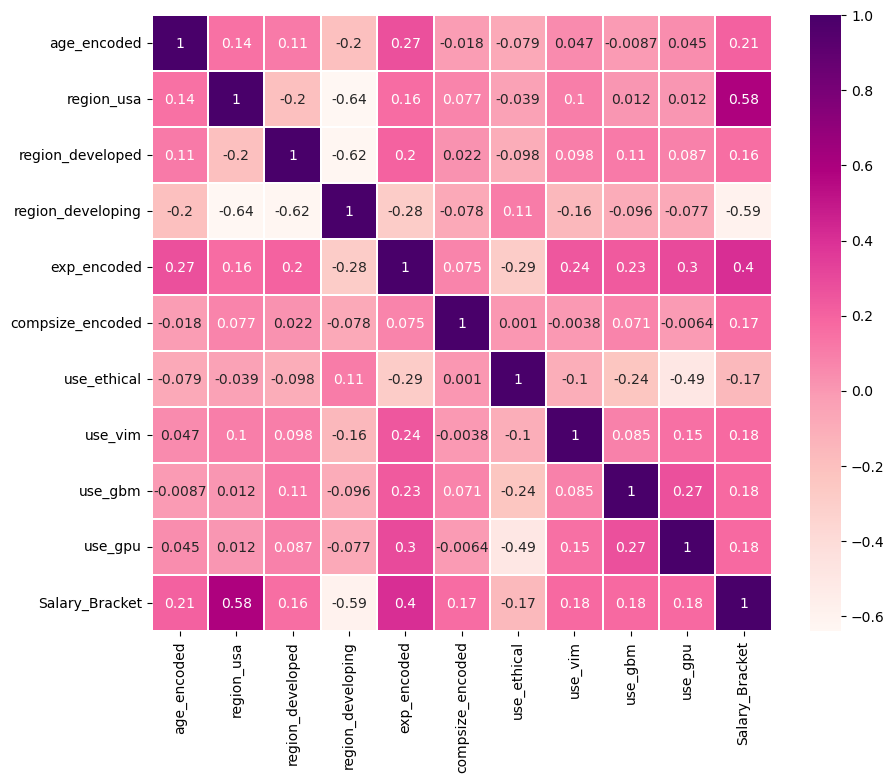

In [35]:
#Correlation Matrix
sns.heatmap(model_data.corr(),annot=True,cmap="RdPu",linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

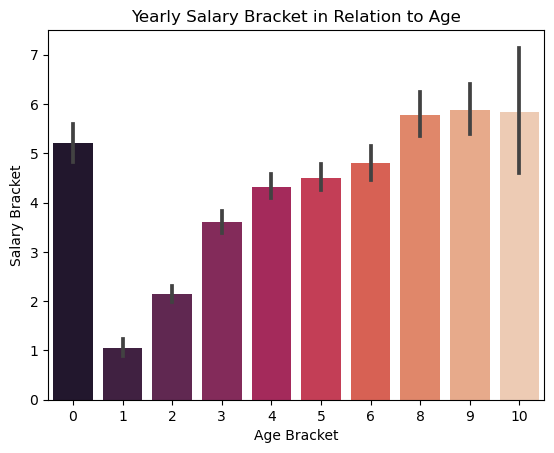

In [36]:
#Visualizing trend in Salary and Age
sns.barplot(data=model_data, x="age_encoded", 
            y="Salary_Bracket", 
            palette = 'rocket').set(title = "Yearly Salary Bracket in Relation to Age",
                                    xlabel='Age Bracket', 
                                    ylabel='Salary Bracket')
plt.show() 


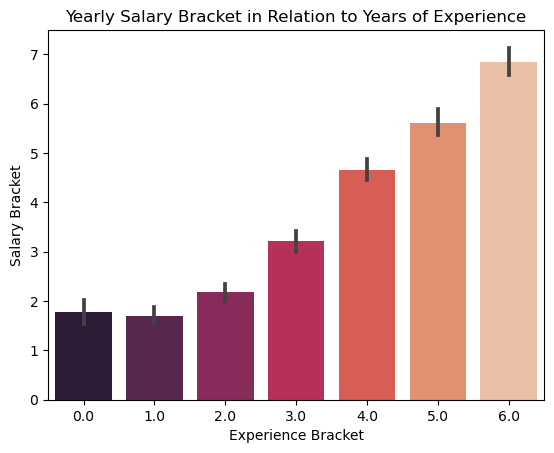

In [37]:
#Visualizing Trend in Experience and Salary
sns.barplot(data=model_data, x="exp_encoded",
            y="Salary_Bracket", 
            palette = 'rocket').set(title = "Yearly Salary Bracket in Relation to Years of Experience",
                                    xlabel='Experience Bracket', 
                                    ylabel='Salary Bracket')
plt.show() 


# Question 3: Model Implementation

In [40]:
#Creating Validation Set (True test set on held-out values)
top_10_train_x,top_10_validate_x, top_10_train_y, top_10_validate_y = train_test_split(top_10, target_data, test_size=0.1, random_state=10)

In [41]:
#Training and testing set split
x_train, x_test, y_train, y_test = train_test_split(top_10_train_x, top_10_train_y, test_size=0.2, random_state=10)

In [42]:
# Average Prob of Class 0/1
def LogModProb(x,y,constant,solver,penalty,x_test):
    log_mod = LogisticRegression(C=constant,solver=solver, penalty= penalty)    
    log_mod.fit(x, y)
    coef= log_mod.coef_[0]
    probs_matrix=log_mod.predict_proba(x_test)
    all_probs=pd.DataFrame(probs_matrix)
    probs=all_probs.mean(axis=0)
    return (probs[0],probs[1], all_probs, coef)
    ''' (variables) -> logistic model for class split
    Returns the probabilities of the target being 0 or 1 for a logisitic model fit
    '''

#Probabilities for each row in a class

def point_pred(probs_df):
    get_class_prob=[probs_df.iloc[:,0]]
    for i in range(0,26,2):
        get_class_prob.append(probs_df.iloc[:,i+2]-probs_df.iloc[:,i])
        if i == 24:
            get_class_prob.append(probs_df.iloc[:,i+3])
    row_probs=pd.DataFrame(get_class_prob,index=np.arange(0,15,1))
    return row_probs
    ''' (probabilities) -> df with appended probabilities per row based on output of log mod
    Returns the probabilities of the target being 0 or 1 for a logisitic model fit for each row in df
    '''

#Generating Class probabilities

def class_probs(probs_list):
    probs_of_classes=[probs_list[0][0]]
    for i in range(len(probs_list)-1):
        probs_of_classes.append(probs_list[i+1][0]-probs_list[i][0])
        if i == len(probs_list)-2:
            probs_of_classes.append(probs_list[-1][1])
    return probs_of_classes
    ''' (list of probabilities) -> prob of each class from binary logistic model output
    calculates the probability of the 0-14 classes based on the splits from the binary logistic model probabilities
    '''

In [43]:
#Defining Fcn Constants/Lists
n_folds = 10
k = KFold(n_splits= n_folds)
k.get_n_splits(x_train)
k_count=0
f1_sum=0
f1_list=[]
coefs_list = []

In [44]:
#Logistic Regression with CV - No Hyperparameter tuning

for index_train, index_test in k.split(x_train):
    x_train_cv = x_train.iloc[index_train]
    x_test_cv =  x_train.iloc[index_test]
    y_train_cv = y_train.iloc[index_train]
    y_test_cv = y_train.iloc[index_test]
    
#Defining fcn vars
    y_probs = pd.DataFrame(index=y_train_cv.index)
    y_probs['class']=1 
    probs_list=[]     
    probs_df=pd.DataFrame()
    penalty = "none"
    constant=1.0
    solver='lbfgs'

#Creating Ordinal LogReg Model
    for i in range(0,14):
        class_0_list = y_train_cv.index[y_train_cv == i].tolist()
        y_probs.loc[class_0_list]=0
        p1,p2,prob_df,coef=LogModProb(x_train_cv,y_train_cv,constant,solver,penalty,x_test_cv)
        probs_list.append([p1,p2])
        probs_df=pd.concat([probs_df,prob_df],axis=1)

#Class Probabilities
    probs_of_classes=class_probs(probs_list)
    row_probs = point_pred(probs_df)
    pred_data = row_probs.idxmax()
    
#Generating F1 Scores    
    k_count+=1
    f1=f1_score(y_test_cv, pred_data, average='micro')
    f1_sum += f1
    f1_list.append(f1) 
    
#Outputting F1 Scores
    if k_count == n_folds:
        print ("Average F1 score: {}".format(f1_sum/n_folds))
        print("Variance of F1 score: {}".format(np.array(f1_list).var()))

Average F1 score: 0.3759548553849106
Variance of F1 score: 0.00023131122993942828


# Question 4: Model Tuning & Testing

In [45]:
#Defining vars for grid search
params={}
acc=0
var = 0
best_pred=0
f1_print=[]
coefs_list = []


In [46]:
#Grid Search - C and Penalty values

for C in [0.25,0.5,1,2,4]:
    print(C)
    for penalty in ['none', 'l2']: 
        print(penalty)
        
        k_grid = KFold(n_splits=n_folds )
        k_grid.get_n_splits(x_train)
        k_count=0
        f1_sum=0
        f1_list=[]

        for index_train, index_test in k_grid.split(x_train):
            x_train_cv = x_train.iloc[index_train]
            x_test_cv = x_train.iloc[index_test]
            y_train_cv = y_train.iloc[index_train]
            y_test_cv = y_train.iloc[index_test]

        #Defining fcn vars
            y_probs = pd.DataFrame(index=y_train_cv.index)
            y_probs['class']=1 
            probs_list=[]     
            probs_df=pd.DataFrame()
            solver='lbfgs'

        #Creating Ordinal LogReg Model
            for i in range(0,14):
                class_0_list = y_train_cv.index[y_train_cv == i].tolist()
                y_probs.loc[class_0_list]=0
                p1,p2,prob_df,coef=LogModProb(x_train_cv,y_train_cv,C,solver,penalty,x_test_cv)
                probs_list.append([p1,p2])
                coefs_list.append(coef)
                probs_df=pd.concat([probs_df,prob_df],axis=1)

        #Class Probabilities
            probs_of_classes=class_probs(probs_list)
            row_probs = point_pred(probs_df)
            pred_data = row_probs.idxmax()

        #Generating F1 Scores    
            k_count+=1
            f1=f1_score(y_test_cv, pred_data, average='micro')
            f1_sum += f1
            f1_list.append(f1) 
            f1_print.append('C= {}, penalty={},Fold {} has a f1-score of {}'.format(C, penalty, k_count,f1))

        if (f1_sum/n_folds ) > acc:
            params = {'C':C, 'penalty':penalty, 'coef':coef}
            acc = f1_sum/n_folds
            var = np.array(f1_list).var()
            best_pred = pred_data

        print (params)

0.25
none
{'C': 0.25, 'penalty': 'none', 'coef': array([-0.08641317, -0.68628882,  0.99581303,  2.48527411, -0.41085085,
       -0.27286843,  0.17514019, -0.27610199, -0.38678115, -0.40281746])}
l2
{'C': 0.25, 'penalty': 'l2', 'coef': array([-0.08557104, -1.11348396,  0.30681558,  1.84658891, -0.39770271,
       -0.26354914,  0.17869158, -0.26421111, -0.34574202, -0.35509327])}
0.5
none
{'C': 0.25, 'penalty': 'l2', 'coef': array([-0.08557104, -1.11348396,  0.30681558,  1.84658891, -0.39770271,
       -0.26354914,  0.17869158, -0.26421111, -0.34574202, -0.35509327])}
l2
{'C': 0.5, 'penalty': 'l2', 'coef': array([-0.08504058, -0.89343745,  0.63809915,  2.1574543 , -0.4015137 ,
       -0.26581466,  0.18544039, -0.274342  , -0.36184501, -0.38070014])}
1
none
{'C': 0.5, 'penalty': 'l2', 'coef': array([-0.08504058, -0.89343745,  0.63809915,  2.1574543 , -0.4015137 ,
       -0.26581466,  0.18544039, -0.274342  , -0.36184501, -0.38070014])}
l2
{'C': 0.5, 'penalty': 'l2', 'coef': array([-0.0850

In [47]:
#output parameters of the best fold
print(params)

{'C': 0.5, 'penalty': 'l2', 'coef': array([-0.08504058, -0.89343745,  0.63809915,  2.1574543 , -0.4015137 ,
       -0.26581466,  0.18544039, -0.274342  , -0.36184501, -0.38070014])}


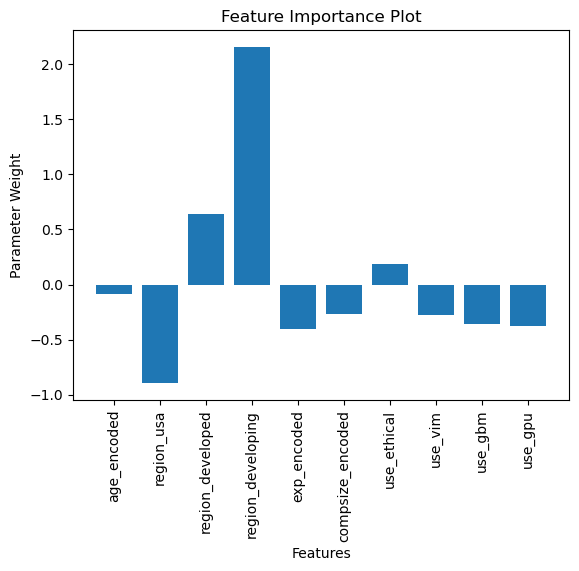

In [48]:
#visualizing feature importance (Weights)

plt.bar([x for x in top_10.columns], params["coef"])
plt.xticks(rotation=90)
plt.title('Feature Importance Plot')
plt.xlabel('Features')
plt.ylabel('Parameter Weight')
plt.show()


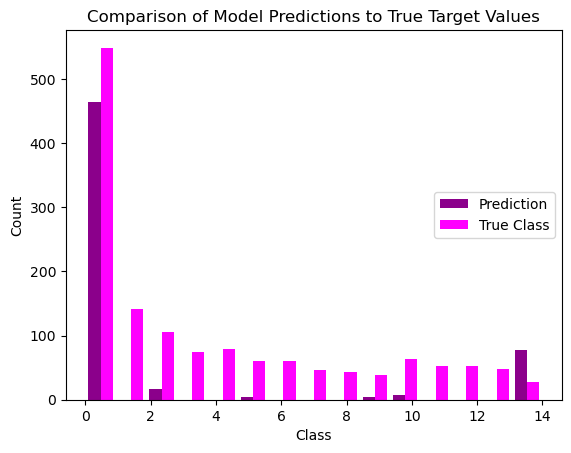

In [49]:
#Visualizing True and Target Values
plt.hist([best_pred, y_test], 
         bins="auto", 
         label=['Prediction', 'True Class'],
         color = ["darkmagenta", "magenta"])
plt.title("Comparison of Model Predictions to True Target Values") 
plt.xlabel('Class')  
plt.ylabel('Count')
plt.legend(loc='center right')

In [50]:
#Model Accuracy
acc

0.3768211066667466

# Question 5: Validation

In [51]:
#Outputting predictions based on held-out set and tuned hyperparameters
y_probs = pd.DataFrame(index=top_10_validate_y.index)
y_probs['class']=1 
probs_list=[]     
probs_df=pd.DataFrame()
solver='lbfgs'
constant=0.5
penalty = "l2"

log_mod_val = LogisticRegression(C=constant,solver=solver, penalty= penalty)    
log_mod_val.fit(top_10_train_x, top_10_train_y)
coef= log_mod_val.coef_[0]
preds =log_mod_val.predict(top_10_validate_x)

In [52]:
#Accuracy of predictions 
acc_test = f1_sum/n_folds
acc_test

0.3757815451596073